# 데이터 로드 및 전처리

### 1. Train Data : 놀면뭐하니

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('howdoyouplay_utf.csv', encoding='utf-8', header=1)
df = df.drop('Unnamed: 0', axis=1).drop('Unnamed: 3', axis=1).iloc[:4998]
df.columns = ['text', 'label']
df['text'] = df.text.apply(lambda x: x.replace('"', '').replace('\\t', '').replace("\\n", ''))
df.dropna(inplace = True) # 감정분류 NA는 의미없는 문장이라서 제거
real_label = [-1, 0, 1]
df = df[df.label.apply(lambda x: x in real_label)]
df['length'] = df.text.apply(lambda x: len(list(x)))
df = df[df.length >= 5].drop('length', axis=1)
# df.to_csv("howdoyouplay_prep_5000.csv", index=False)

In [96]:
df.head()

,text,label
0,이효리는 왜자꾸 나옴?? 나와서 잡음만 만들고 ㅋㅋ 연타로 나와서 식상하고 컨셉도 ...,-1.0
1,당신이 뭔데 코디가 있쒀,0.0
2,당신뭔데 라는 말,0.0
3,이효리가유재석한테 너무 함부로해,0.0
4,그캐 영어쓰고싶으면 니 나라가서 맘껏써라! 몬애들이 한국말 제대로 배울생각은 없고...,-1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


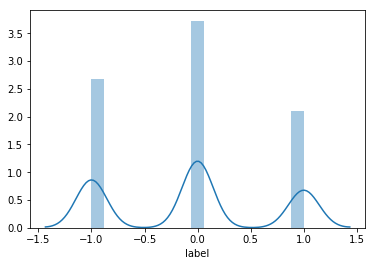

In [82]:
sns.distplot(df.label)

### 2. Test Data : 아는형님

In [112]:
test = pd.read_csv('knownbrother.csv', encoding='utf-8', header=0)
test.head()

,Index,댓글 text,감성 라벨링,악플 여부
0,0,"""ㅋㅋ 그래도 아직 볼만함""",1.0,0.0
1,1,"""저도요ㅠㅜ 나규ㅜㅠ""",0.0,0.0
2,2,"""이상엽 이민정 배우님들 제일 보고싶었는데""",0.0,0.0
3,3,"""난 니가 더 노잼ㅠ""",-1.0,1.0
4,4,"""김희철 노잼""",-1.0,1.0


In [118]:
test = test[['댓글 text', '감성 라벨링']]
test.columns = ['text', 'label']
test = test.iloc[:1000]

In [121]:
test['text'] = test.text.apply(lambda x: x.replace('"', '').replace('\\t', '').replace("\\n", ''))
test.dropna(inplace = True) # 감정분류 NA는 의미없는 문장이라서 제거
real_label = [-1, 0, 1]
test = test[test.label.apply(lambda x: x in real_label)]
test['length'] = test.text.apply(lambda x: len(list(x)))
test = test[test.length >= 5].drop('length', axis=1)
# test.to_csv("knownbrother_test_1000.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
test.head()

,text,label
0,ㅋㅋ 그래도 아직 볼만함,1.0
1,저도요ㅠㅜ 나규ㅜㅠ,0.0
2,이상엽 이민정 배우님들 제일 보고싶었는데,0.0
3,난 니가 더 노잼ㅠ,-1.0
4,김희철 노잼,-1.0
